<a href="https://colab.research.google.com/github/moneshj/Tamil_Thirukural_Analysis/blob/main/Tamil_Thirukural_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#**திருக்குறள் தகவல்கள் பகுப்பாய்வு**

- https://www.kaggle.com/rahulvks/thirukkural


---
This Dataset is about - Thirukkural is an ancient book of wisdom,the greatest classic of the Tamil language, the distillation of the essential genius of the Tamil Nadu, it consisting of 1330 couplets or Kurals and authored by Thiruvalluvar.Thirukural was written by a Tamil Philosopher/Poet, 2000 years before.It explains and teaches the principle, discipline, rules, guideline to a man/woman born in any part of the earth in any period of timeline. - Words of Wisdom and Guidance to Life (Tamil Marai).


---


The Dataset contains :


*   அறத்துப்பால்	380
*   காமத்துப்பால்	250
*   பொருட்பால்	 700
*   Total:	       1330

In [1]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [3]:
!cp /content/data.zip /content/drive/MyDrive/datasets

In [4]:
!unzip /content/archive.zip

Archive:  /content/archive.zip
  inflating: Thirukural With Explanation.csv  
  inflating: Thirukural.csv          


In [6]:
nRowsRead = 1330


In [9]:
from google.colab import data_table
data_table.enable_dataframe_formatter()

In [10]:
df =pd.read_csv('/content/Thirukural With Explanation.csv',delimiter=',',nrows=nRowsRead)

In [13]:
df.head()

,Chapter Name,Section Name,Verse,Translation,Explanation
0,அறத்துப்பால்,கடவுள் வாழ்த்து,அகர\tமுதல\tஎழுத்தெல்லாம்\tஆதி\t\t\tபகவன்\tமுதற...,"Translation :A, as its first of letters, every...",Explanation :As all letters have the letter A ...
1,அறத்துப்பால்,கடவுள் வாழ்த்து,கற்றதனால்\tஆய\tபயனென்கொல்\tவாலறிவன்\t\t\tநற்றா...,Translation :No fruit have men of all their st...,Explanation :What Profit have those derived fr...
2,அறத்துப்பால்,கடவுள் வாழ்த்து,மலர்மிசை\tஏகினான்\tமாணடி\tசேர்ந்தார்\t\t\tநிலம...,"Translation :His feet, 'Who o'er the full-blow...",Explanation :They who are united to the glorio...
3,அறத்துப்பால்,கடவுள் வாழ்த்து,வேண்டுதல்\tவேண்டாமை\tஇலானடி\tசேர்ந்தார்க்கு\t\...,"Translation :His foot, 'Whom want affects not,...",Explanation :To those who meditate the feet of...
4,அறத்துப்பால்,கடவுள் வாழ்த்து,இருள்சேர்\tஇருவினையும்\tசேரா\tஇறைவன்\t\t\tபொரு...,"Translation :The men, who on the 'King's' true...",Explanation :The two-fold deeds that spring fr...


In [ ]:
nRowsRead = 1330 # specify 'None' if want to read whole file
# Thirukural With Explanation.csv has 1330 rows in reality, but we are only loading/previewing the first 1000 rows
df1 = pd.read_csv('/content/Thirukural.csv', delimiter=',', nrows = nRowsRead)
df1.dataframeName = 'Thirukural With Explanation.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1330 rows and 4 columns


In [ ]:
df1.tail(6)

,Chapter Name,Section Name,Verse,Translation
1324,காமத்துப்பால்,ஊடலுவகை,தவறிலர்\tஆயினும்\tதாம்வீழ்வார்\tமென்றோள்\t\t\t...,"Though free from fault, from loved one's tende..."
1325,காமத்துப்பால்,ஊடலுவகை,உணலினும்\tஉண்டது\tஅறல்இனிது\tகாமம்\t\t\tபுணர்த...,'Tis sweeter to digest your food than 'tis to ...
1326,காமத்துப்பால்,ஊடலுவகை,ஊடலில்\tதோற்றவர்\tவென்றார்\tஅதுமன்னும்\t\t\tகூ...,"In lovers' quarrels, 'tis the one that first g..."
1327,காமத்துப்பால்,ஊடலுவகை,ஊடிப்\tபெறுகுவம்\tகொல்லோ\tநுதல்வெயர்ப்பக்\t\t\...,And shall we ever more the sweetness know of t...
1328,காமத்துப்பால்,ஊடலுவகை,ஊடுக\tமன்னோ\tஒளியிழை\tயாமிரப்ப\t\t\tநீடுக\tமன்...,"Let her, whose jewels brightly shine, aversion..."
1329,காமத்துப்பால்,ஊடலுவகை,ஊடுதல்\tகாமத்திற்கு\tஇன்பம்\tஅதற்கின்பம்\t\t\t...,A 'feigned aversion' coy to pleasure gives a z...


In [ ]:
# Histogram of column data
def plotHistogram(df, nHistogramShown, nHistogramPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nHistRow = (nCol + nHistogramPerRow - 1) / nHistogramPerRow
    plt.figure(num=None, figsize=(6*nHistogramPerRow, 8*nHistRow), dpi=80, facecolor='w', edgecolor='k')
    for i in range(min(nCol, nHistogramShown)):
        plt.subplot(nHistRow, nHistogramPerRow, i+1)
        df.iloc[:,i].hist()
        plt.ylabel('counts')
        plt.xticks(rotation=90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad=1.0, w_pad=1.0, h_pad=1.0)
    plt.show()

In [ ]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

In [ ]:
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2949 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2993 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2980 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3021 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3009 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2986 missing from current font.
  font.set_text(s

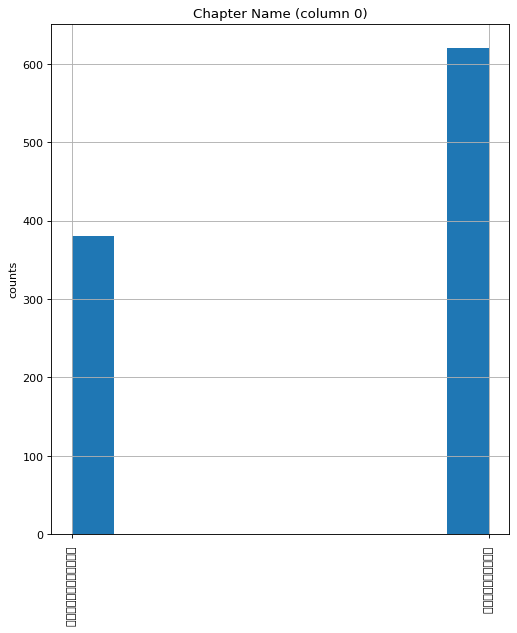

In [ ]:
plotHistogram(df1, 10, 5)

# Reference Links :
 - https://www.kaggle.com/christya/predictive-analyzers
 - https://api-thirukkural.web.app/



In [ ]:
!wget https://api-thirukkural.vercel.app/api?num=1


--2021-09-06 08:46:24--  https://api-thirukkural.vercel.app/api?num=1
Resolving api-thirukkural.vercel.app (api-thirukkural.vercel.app)... 76.76.21.21
Connecting to api-thirukkural.vercel.app (api-thirukkural.vercel.app)|76.76.21.21|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 785 [text/html]
Saving to: ‘api?num=1’

api?num=1           100%[===================>]     785  --.-KB/s    in 0s      

2021-09-06 08:46:25 (123 MB/s) - ‘api?num=1’ saved [785/785]



In [ ]:
a = '/content/api?num=1'

In [ ]:
!wget 'https://api-thirukkural.vercel.app/api?num=1' -O - >> hi.json

--2021-10-12 15:39:14--  https://api-thirukkural.vercel.app/api?num=1
Resolving api-thirukkural.vercel.app (api-thirukkural.vercel.app)... 76.76.21.21
Connecting to api-thirukkural.vercel.app (api-thirukkural.vercel.app)|76.76.21.21|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 785 [text/html]
Saving to: ‘STDOUT’

-                   100%[===================>]     785  --.-KB/s    in 0s      

2021-10-12 15:39:16 (133 MB/s) - written to stdout [785/785]



In [ ]:
jsondata = {"number":1,"sect_tam":"அறத்துப்பால்","chapgrp_tam":"பாயிரவியல்","chap_tam":"கடவுள் வாழ்த்து","line1":"அகர முதல எழுத்தெல்லாம் ஆதி","line2":"பகவன் முதற்றே உலகு.","tam_exp":"அகரம் எழுத்துக்களுக்கு முதன்மை; ஆதிபகவன், உலகில் வாழும் உயிர்களுக்கு முதன்மை","sect_eng":"Virtue","chapgrp_eng":"Prologue","chap_eng":"The Praise of God","eng":"'A' leads letters; the Ancient Lord Leads and lords the entire world","eng_exp":"As the letter A is the first of all letters, so the eternal God is first in the world"}
import json
import pandas as pd

#jdata = json.loads(jsondata)
#df = pd.DataFrame(jdata)
df = pd.DataFrame.from_dict(jsondata, orient='columns')
#print(df.T)

ValueError: ignored

In [ ]:
df = pd.DataFrame.from_records([jsondata],index='number')

In [ ]:
pd.DataFrame([jsondata])

,number,sect_tam,chapgrp_tam,chap_tam,line1,line2,tam_exp,sect_eng,chapgrp_eng,chap_eng,eng,eng_exp
0,1,அறத்துப்பால்,பாயிரவியல்,கடவுள் வாழ்த்து,அகர முதல எழுத்தெல்லாம் ஆதி,பகவன் முதற்றே உலகு.,"அகரம் எழுத்துக்களுக்கு முதன்மை; ஆதிபகவன், உலகி...",Virtue,Prologue,The Praise of God,'A' leads letters; the Ancient Lord Leads and ...,"As the letter A is the first of all letters, s..."


TypeError: ignored

# Tamil Word Embedding


https://fasttext.cc/docs/en/crawl-vectors.html

In [ ]:
!pip install fasttext

     |████████████████████████████████| 68 kB 3.3 MB/s 
  Using cached pybind11-2.8.1-py2.py3-none-any.whl (208 kB)
  Created wheel for fasttext: filename=fasttext-0.9.2-cp37-cp37m-linux_x86_64.whl size=3121280 sha256=7744ec9502dfde0e022f4cf8d4be20341a900cf349497324be6314c2a680cff1
  Stored in directory: /root/.cache/pip/wheels/4e/ca/bf/b020d2be95f7641801a6597a29c8f4f19e38f9c02a345bab9b
Successfully built fasttext


In [ ]:
import fasttext.util

In [ ]:
fasttext.util.download_model('ta',if_exists='ignore')

'cc.ta.300.bin'

In [ ]:
!wget https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.ta.300.vec.gz

--2021-10-28 14:16:13--  https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.ta.300.vec.gz
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 172.67.9.4, 104.22.75.142, 104.22.74.142, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|172.67.9.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1213735937 (1.1G) [binary/octet-stream]
Saving to: ‘cc.ta.300.vec.gz’

cc.ta.300.vec.gz    100%[===================>]   1.13G  22.1MB/s    in 55s     

2021-10-28 14:17:09 (21.1 MB/s) - ‘cc.ta.300.vec.gz’ saved [1213735937/1213735937]



Downloaded file is in drive...

In [ ]:
ft = fasttext.load_model('cc.ta.300.bin')

In [ ]:
ft.get_dimension()

300

In [ ]:
fasttext.util.reduce_model(ft,100)

In [ ]:
ft.get_word_vector('திருக்குறள்').shape

(300,)

In [ ]:
!cp /content/cc.ta.300.bin /content/drive/MyDrive

In [ ]:
ft.get_nearest_neighbors('திருக்குறள்')

[(0.877907395362854, 'திருக்குறள்ல'),
 (0.8666226267814636, 'திருக்குறள்.பா'),
 (0.8464869856834412, 'திருக்குறள்by'),
 (0.8453330397605896, 'kதிருக்குறள்'),
 (0.8330744504928589, 'திருக்குறள்மணி'),
 (0.8178834319114685, 'திருக்குறள்வேள்'),
 (0.8055881261825562, 'திருக்குறள்Tags'),
 (0.7986128926277161, 'திருக்குறள்தான்'),
 (0.7862473130226135, 'உரைதிருக்குறள்'),
 (0.7777959108352661, 'திருக்குறள்சொல்')]

In [ ]:
f=ft.get_sentence_vector('அகர முதல எழுத்தெல்லாம் ஆதி பகவன் முதற்றே உலகு')

In [ ]:
import numpy as np
f1 = np.array(f).reshape(1,300)

In [ ]:
f1.shape

(1, 300)

In [ ]:
thiru_features = []
thiru_features.append(f1)

In [ ]:
image_features_arr = np.asarray(thiru_features)
image_features_arr = np.rollaxis(image_features_arr,1,0)
image_features_arr = image_features_arr[0,:,:]

np.savetxt('feature_vectors.txt',image_features_arr)


In [ ]:
import tensorflow as tf
import numpy as np
feature_vectors = np.loadtxt('/content/features/feature_vectors.txt')
print ("feature_vectors_shape:",feature_vectors.shape)
print ("num of videos:",feature_vectors.shape[0])
num_of_samples=feature_vectors.shape[0]
num_of_samples_each_class = 1

features = tf.Variable(feature_vectors, name='features')





feature_vectors_shape: (300,)
num of videos: 300
Instructions for updating:
Colocations handled automatically by placer.


In [ ]:
!pip install tensorflow==1.13.2

     |████████████████████████████████| 92.7 MB 1.5 MB/s 
     |████████████████████████████████| 3.2 MB 35.2 MB/s 
     |████████████████████████████████| 367 kB 42.9 MB/s 
     |████████████████████████████████| 50 kB 6.3 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.6.0
    Uninstalling tensorflow-estimator-2.6.0:
      Successfully uninstalled tensorflow-estimator-2.6.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.6.0
    Uninstalling tensorboard-2.6.0:
      Successfully uninstalled tensorboard-2.6.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.6.0
    Uninstalling tensorflow-2.6.0:
      Successfully uninstalled tensorflow-2.6.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
kapre 0.3.5 requires tensorflow>=2.0.0, but you

In [ ]:
import tensorflow as tf
import os
from tensorflow.contrib.tensorboard.plugins import projector
with tf.Session() as sess:
    saver = tf.train.Saver([features])

    sess.run(features.initializer)
    saver.save(sess, os.path.join('videos_embed_classes.ckpt'))
    
    config = projector.ProjectorConfig()
    
    embedding = config.embeddings.add()
    embedding.tensor_name = features.name
          
    projector.visualize_embeddings(tf.summary.FileWriter('/content/features/'), config)

In [ ]:
!pip install tensorflow==2.2

     |████████████████████████████████| 516.2 MB 4.5 kB/s 
     |████████████████████████████████| 454 kB 49.7 MB/s 
     |████████████████████████████████| 3.0 MB 34.1 MB/s 
     |████████████████████████████████| 2.9 MB 38.6 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 1.13.0
    Uninstalling tensorflow-estimator-1.13.0:
      Successfully uninstalled tensorflow-estimator-1.13.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 1.13.1
    Uninstalling tensorboard-1.13.1:
      Successfully uninstalled tensorboard-1.13.1
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0
  Attempting uninstall: gast
    Found existing installation: gast 0.4.0
    Uninstalling gast-0.4.0:
      Successfully uninstalled gast-0.4.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 1.13.2
    Uni

In [ ]:
!kill 1591

In [ ]:
%load_ext tensorboard
%tensorboard --logdir=/content/

Reusing TensorBoard on port 6006 (pid 1820), started 0:01:26 ago. (Use '!kill 1820' to kill it.)

<IPython.core.display.Javascript object>